In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("suicide rate.csv")

In [13]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
 11  gdp_for_year ($)    27820 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.5+ MB


(None,
    country  year     sex          age  suicides_no  population  \
 0  Albania  1987    male  15-24 years           21      312900   
 1  Albania  1987    male  35-54 years           16      308000   
 2  Albania  1987  female  15-24 years           14      289700   
 3  Albania  1987    male    75+ years            1       21800   
 4  Albania  1987    male  25-34 years            9      274300   
 
    suicides/100k pop country-year  HDI for year  gdp_per_capita ($)  \
 0               6.71  Albania1987           NaN                 796   
 1               5.19  Albania1987           NaN                 796   
 2               4.83  Albania1987           NaN                 796   
 3               4.59  Albania1987           NaN                 796   
 4               3.28  Albania1987           NaN                 796   
 
         generation  gdp_for_year ($)  
 0     Generation X      2.156625e+09  
 1           Silent      2.156625e+09  
 2     Generation X      2.156625e+

In [7]:
df['gdp_for_year ($)'] = df[' gdp_for_year ($) '].str.replace(',', '').astype(float)

In [8]:
df.drop(columns=[' gdp_for_year ($) '], inplace=True)

In [9]:
df_clean = df.dropna()

In [11]:
Q1 = df_clean['suicides/100k pop'].quantile(0.25)
Q3 = df_clean['suicides/100k pop'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['suicides/100k pop'] >= lower_bound) & 
                    (df_clean['suicides/100k pop'] <= upper_bound)]

In [12]:
cleaned_count = len(df_clean)

df_clean.info(), cleaned_count

<class 'pandas.core.frame.DataFrame'>
Index: 7745 entries, 72 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             7745 non-null   object 
 1   year                7745 non-null   int64  
 2   sex                 7745 non-null   object 
 3   age                 7745 non-null   object 
 4   suicides_no         7745 non-null   int64  
 5   population          7745 non-null   int64  
 6   suicides/100k pop   7745 non-null   float64
 7   country-year        7745 non-null   object 
 8   HDI for year        7745 non-null   float64
 9   gdp_per_capita ($)  7745 non-null   int64  
 10  generation          7745 non-null   object 
 11  gdp_for_year ($)    7745 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 786.6+ KB


(None, 7745)

In [14]:
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

In [15]:
mean_suicide_rate = np.mean(df_clean['suicides/100k pop'])

In [16]:
std_gdp_per_capita = np.std(df_clean['gdp_per_capita ($)'])

In [17]:
correlation_matrix = np.corrcoef(df_clean['suicides_no'], df_clean['population'])

In [18]:
max_population = np.max(df_clean['population'])

In [19]:
unique_years = np.unique(df_clean['year'])

In [20]:
scipy_corr, scipy_p = pearsonr(df_clean['gdp_per_capita ($)'], df_clean['suicides/100k pop'])

In [24]:
X = df_clean['gdp_per_capita ($)']
Y = df_clean['suicides/100k pop']
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(Y, X).fit()
regression_summary = model.summary()

{
    "NumPy": {
        "Mean Suicide Rate": mean_suicide_rate,
        "Std GDP per Capita": std_gdp_per_capita,
        "Correlation Matrix (Suicides vs Pop)": correlation_matrix.tolist(),
        "Max Population": max_population,
        "Unique Years Count": len(unique_years)
    },
    "SciPy": {
        "Pearson Correlation": scipy_corr,
        "P-Value": scipy_p
    },
    "Statsmodels Regression Summary": str(regression_summary)
}

{'NumPy': {'Mean Suicide Rate': 8.103883795997417,
  'Std GDP per Capita': 22898.98512565371,
  'Correlation Matrix (Suicides vs Pop)': [[0.9999999999999998,
    0.7319168910310875],
   [0.7319168910310876, 1.0]],
  'Max Population': 43509335,
  'Unique Years Count': 10},
 'SciPy': {'Pearson Correlation': 0.1086777661853536,
  'P-Value': 8.712083917883e-22},
 'Statsmodels Regression Summary': '                            OLS Regression Results                            \n==============================================================================\nDep. Variable:      suicides/100k pop   R-squared:                       0.012\nModel:                            OLS   Adj. R-squared:                  0.012\nMethod:                 Least Squares   F-statistic:                     92.54\nDate:                Mon, 26 May 2025   Prob (F-statistic):           8.71e-22\nTime:                        00:53:52   Log-Likelihood:                -27944.\nNo. Observations:                7745   AIC

In [48]:
mean_rate = np.mean(df_clean['suicides/100k pop'])
std_dev = np.std(df_clean['suicides/100k pop'])
min_val = np.min(df_clean['suicides/100k pop'])
max_val = np.max(df_clean['suicides/100k pop'])
median_val = np.median(df_clean['suicides/100k pop'])

print(mean_rate, std_dev, min_val, max_val, median_val)

7.167446438136047 7.678549168152954 0.0 30.04 4.465


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('suicide rate.csv')

In [28]:
df['gdp_for_year ($)'] = df[' gdp_for_year ($) '].str.replace(',', '').astype(float)
df.drop(columns=[' gdp_for_year ($) '], inplace=True)
df_clean = df.dropna()

In [30]:
Q1 = df_clean['suicides/100k pop'].quantile(0.25)
Q3 = df_clean['suicides/100k pop'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_clean = df_clean[(df_clean['suicides/100k pop'] >= lower_bound) & 
                    (df_clean['suicides/100k pop'] <= upper_bound)]


In [36]:
sns.set(style="whitegrid")

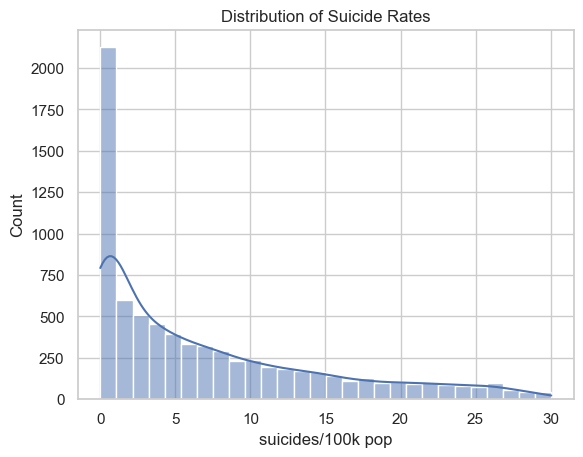

In [49]:
sns.histplot(df_clean['suicides/100k pop'], kde=True)
plt.title('Distribution of Suicide Rates')
plt.show()

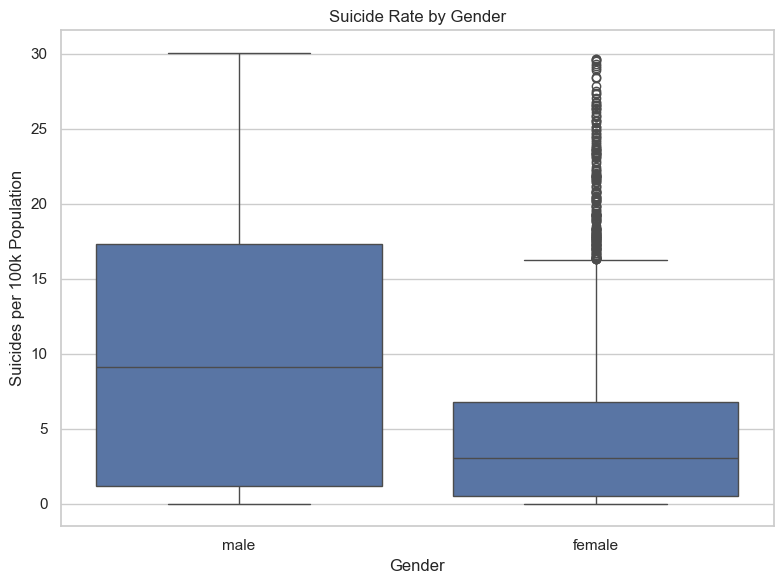

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='sex', y='suicides/100k pop')
plt.title("Suicide Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Suicides per 100k Population")
plt.tight_layout()
plt.savefig("plot2_gender.png")
plt.show()

C:\Users\jenelyn barrameda\AppData\Local\Temp\ipykernel_33060\2929064172.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


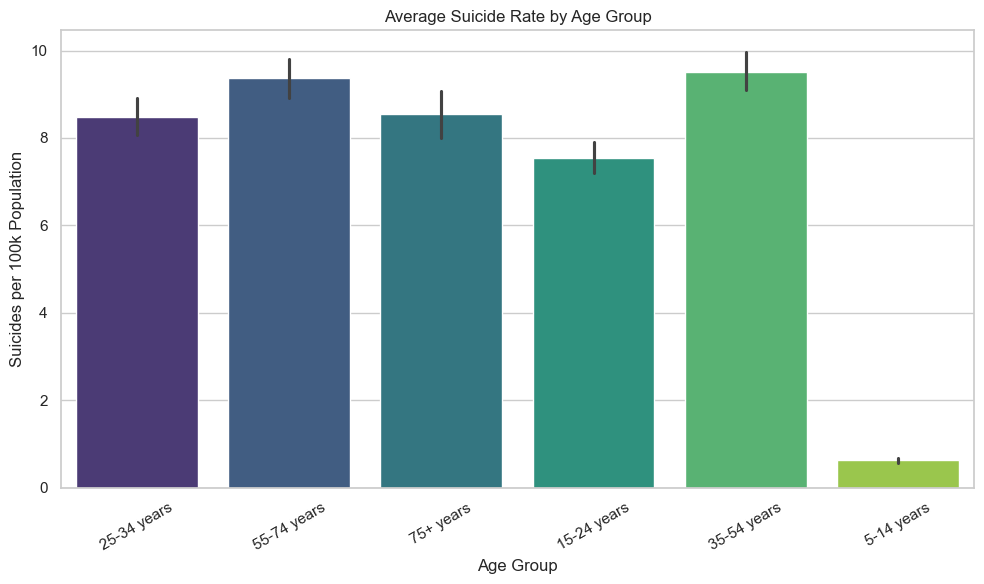

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='age', y='suicides/100k pop', hue='age', dodge=False, palette='viridis')
plt.legend().remove()
plt.title('Average Suicide Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicides per 100k Population')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

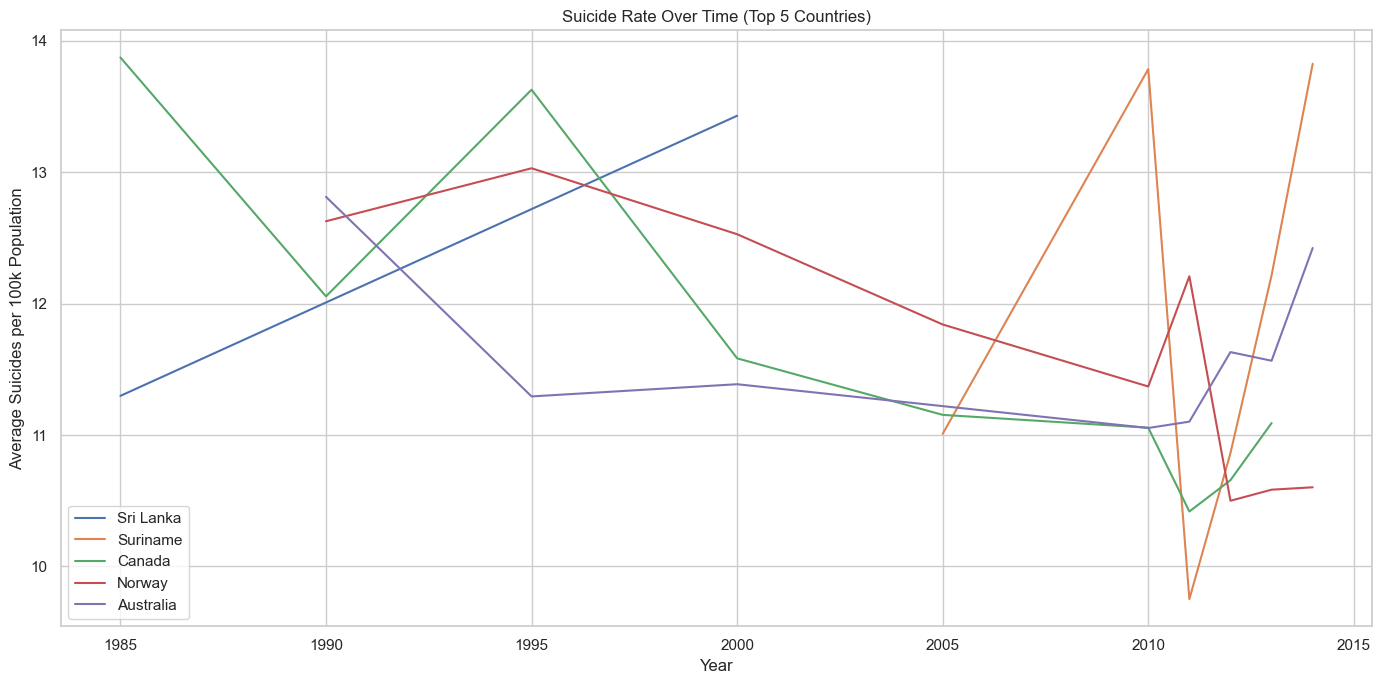

In [47]:
top_countries = df_clean.groupby('country')['suicides/100k pop'].mean().sort_values(ascending=False).head(5).index
plt.figure(figsize=(14, 7))
for country in top_countries:
    country_data = df_clean[df_clean['country'] == country]
    country_yearly_avg = country_data.groupby('year')['suicides/100k pop'].mean()
    plt.plot(country_yearly_avg.index, country_yearly_avg.values, label=country)
plt.title('Suicide Rate Over Time (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Average Suicides per 100k Population')
plt.legend()
plt.tight_layout()
plt.savefig('plot4_time_country.png')
plt.show()

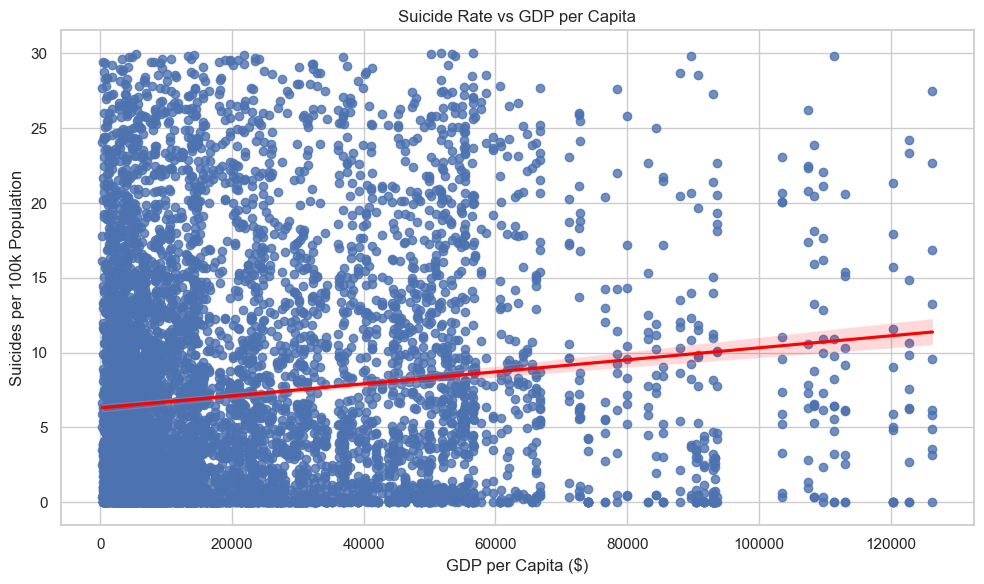

In [43]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='gdp_per_capita ($)', y='suicides/100k pop', line_kws={"color": "red"})
plt.title("Suicide Rate vs GDP per Capita")
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Suicides per 100k Population")
plt.tight_layout()
plt.savefig("plot1_regression.png")
plt.show()

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from scipy.stats import pearsonr

In [57]:
corr1, _ = pearsonr(df_clean['suicides/100k pop'], df_clean['gdp_per_capita ($)'])
corr2, _ = pearsonr(df_clean['suicides/100k pop'], df_clean['year'])

print("GDP correlation:", corr1)
print("Year correlation:", corr2)

GDP correlation: 0.12019382146609249
Year correlation: -0.05584721283142584
